In [10]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [11]:
def get_data(input_file):
    with open(input_file, 'r') as data_file:
        distances = []
        masses = []
        data_file.readline() #ignore header
        for line in data_file:
            d, m = line.split(',')
            distances.append(float(d))
            masses.append(float(m))
    return (masses, distances)

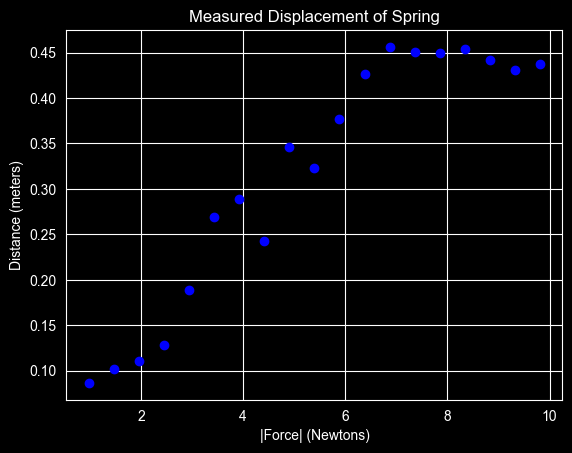

In [20]:
def plot_data(input_file):
    masses , distances = get_data(input_file)
    distances = np.array(distances)
    masses = np.array(masses)
    g = 9.81

    forces = masses * g

    plt.plot(forces, distances, 'bo',
               label = 'Measured displacements')
    plt.title('Measured Displacement of Spring')
    plt.xlabel('|Force| (Newtons)')
    plt.ylabel('Distance (meters)')



plot_data('springData.csv')

In [21]:
def fit_data(input_file):
    masses, distances = get_data(input_file)
    distances = np.array(distances)
    forces = np.array(masses)*9.81
    plt.plot(forces, distances, 'bo',
               label = 'Measured displacements')
    plt.title('Measured Displacement of Spring')
    plt.xlabel('|Force| (Newtons)')
    plt.ylabel('Distance (meters)')
    #find linear fit
    a,b = np.polyfit(forces, distances, 1)
    predicted_distances = a*np.array(forces) + b
    k = 1.0/a #see explanation in text
    plt.plot(forces, predicted_distances,
             label = f'Linear fit, k = {k:.4f}')
    plt.legend(loc = 'best')

    fit = np.polyfit(forces, distances, 3)
    predicted_distances = np.polyval(fit, forces)
    plt.plot(forces, predicted_distances, 'k:', label = 'cubic fit')
    plt.legend(loc = 'best')




fit_data('springData.csv')

NameError: name 'fit' is not defined

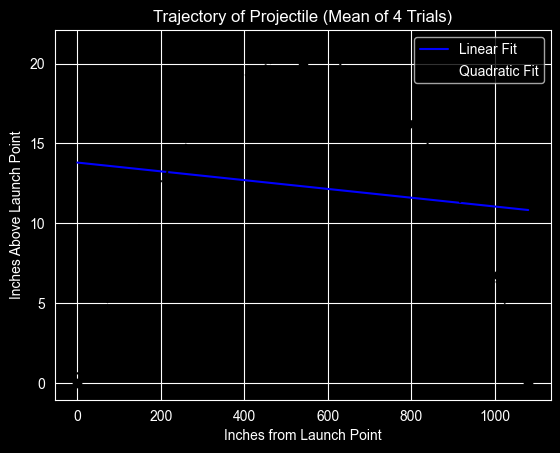

In [18]:
def get_trajectory_data(file_name):
    distances = []
    heights1, heights2, heights3, heights4 = [],[],[],[]
    with open(file_name, 'r') as data_file:
        data_file.readline()
        for line in data_file:
            d, h1, h2, h3, h4 = line.split(',')
            distances.append(float(d))
            heights1.append(float(h1))
            heights2.append(float(h2))
            heights3.append(float(h3))
            heights4.append(float(h4))
    return (distances, [heights1, heights2, heights3, heights4])

def process_trajectories(file_name):
    distances, heights = get_trajectory_data(file_name)
    num_trials = len(heights)
    distances = np.array(distances)
    tot_heights = np.array([0]*len(distances))
    for h in heights:
        tot_heights = tot_heights + np.array(h)
    mean_heights = tot_heights/len(heights)
    plt.title('Trajectory of Projectile (Mean of '\
                + str(num_trials) + ' Trials)')
    plt.xlabel('Inches from Launch Point')
    plt.ylabel('Inches Above Launch Point')
    plt.plot(distances, mean_heights, 'ko')
    fit = np.polyfit(distances, mean_heights, 1)
    altitudes = np.polyval(fit, distances)
    plt.plot(distances, altitudes, 'b', label = 'Linear Fit')
    fit = np.polyfit(distances, mean_heights, 2)
    altitudes = np.polyval(fit, distances)
    plt.plot(distances, altitudes, 'k:', label = 'Quadratic Fit')
    plt.legend()

process_trajectories('launcherData.csv')



In [23]:
def get_horizontal_speed(quad_fit, min_x , max_x):
    inches_per_foot = 12
    x_mid = (max_x - min_x) / 2
    a,b,c = quad_fit[0] , quad_fit[1] , quad_fit[2]
    y_peak = a*x_mid **2 + b*x_mid + c
    g = 32.16*inches_per_foot
    t = (2*y_peak/g)**0.5

    print(f'Horizontal Speed = {int(x_mid/(t*inches_per_foot))}')

